In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset from the csv file
data = pd.read_csv('train.csv')

In [3]:
# Checking information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


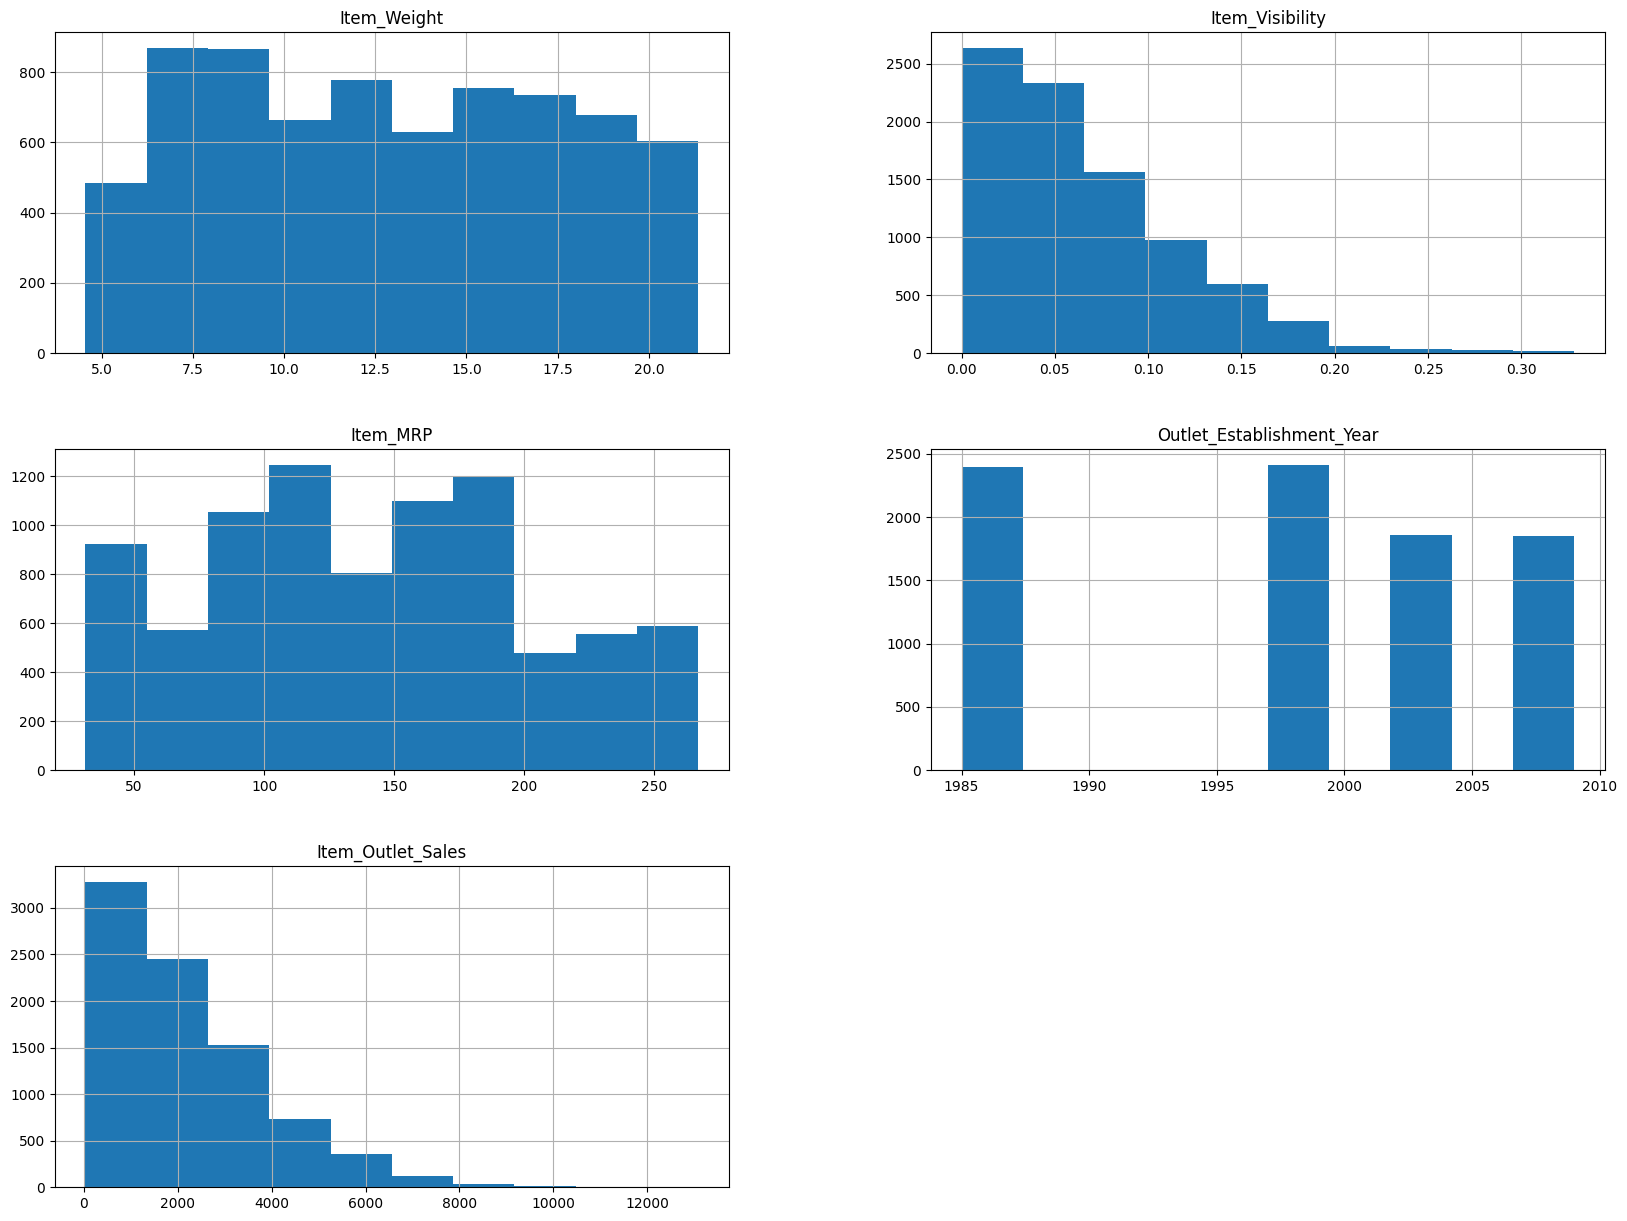

In [4]:
# Plotting the distribution of each feature of the dataset in its individual histogram
data.hist(figsize=(20, 15))
plt.show()

In [5]:
# CHECKING FOR MISSING VALUES
print(data.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


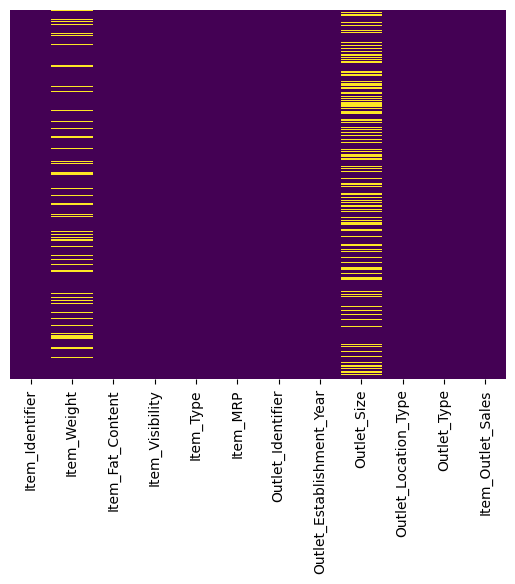

In [6]:
# Plotting the missing values on a heatmap
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()


In [7]:
# Trying different ways to fill the missing values without changing the original dataset
data["Item_Weight_mean"] = data["Item_Weight"].fillna(data["Item_Weight"].mean())
data["Item_Weight_median"] = data["Item_Weight"].fillna(data["Item_Weight"].median())

In [8]:
# We will compare now the variance of the original dataset and the dataset with the missing values filled
print(data["Item_Weight"].var())
print(data["Item_Weight_mean"].var())
print(data["Item_Weight_median"].var())

21.561688259836558
17.86012173506058
17.869561454073647


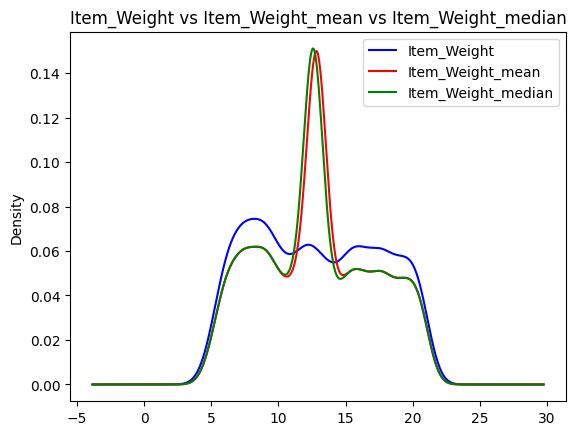

In [9]:
# We will plot the dataset with the missing values filled to check the difference
data["Item_Weight"].plot(kind='kde', color='blue')
data["Item_Weight_mean"].plot(kind='kde', color='red')
data["Item_Weight_median"].plot(kind='kde', color='green')
plt.title('Item_Weight vs Item_Weight_mean vs Item_Weight_median')
plt.legend()
plt.show()

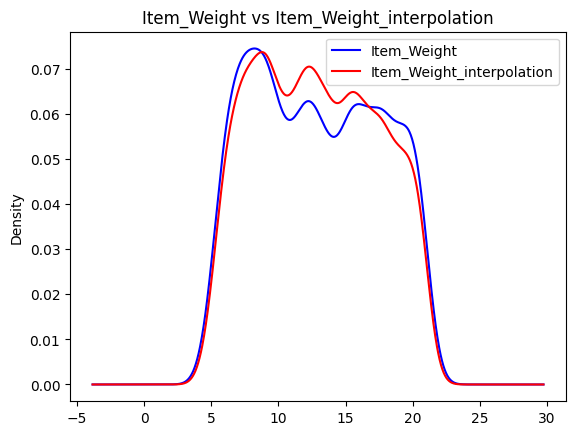

In [10]:
# There difference is quite noticeable, so we try interpolation to fill the missing values
# Interpolation is a process of determining the unknown values that lie in between the known data points. -- Google
data["Item_Weight_interpolation"] = data["Item_Weight"].interpolate(method = "linear")

# We will compare the plots of the original dataset and the dataset with the missing values filled using interpolation
data["Item_Weight"].plot(kind='kde', color='blue')
data["Item_Weight_interpolation"].plot(kind='kde', color='red')
plt.title('Item_Weight vs Item_Weight_interpolation')
plt.legend()
plt.show()


In [11]:
# We can see that interpolationn gives better results than mean and median, so we will use interpolation to fill the missing values
data["Item_Weight"] = data["Item_Weight"].interpolate(method = "linear")
data.drop(["Item_Weight_mean", "Item_Weight_median", "Item_Weight_interpolation"], axis=1, inplace=True)

In [12]:
# We check for missing values again
print(data.isnull().sum())

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [13]:
# We treat the other missing values in the dataset
# But as we know that outlet size is not a numerical value, so we need to figure out a way to fill the missing values

# We will use mode to replace the missing values
mode_outlet_size = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
mode_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [14]:
# We fill the missing values in the Outlet_Size column
missing_val = data["Outlet_Size"].isnull()
data.loc[missing_val, "Outlet_Size"] = data.loc[missing_val, "Outlet_Type"].apply(lambda x: mode_outlet_size[x])

In [15]:
# Checking again for missing values in the dataset
print(data.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [16]:
# No missing values are present in the dataset now so we can move forward

In [17]:
# Dropping unnecessary columns
data = data.drop('Item_Identifier', axis=1)
data = data.drop('Outlet_Identifier', axis=1)

In [18]:
# Checking the first 5 rows of the dataset
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Small,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [19]:
# We have categorical data in the dataset, so we need to convert it into numerical data
# We will use Label Encoding for this purpose

from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
data["Item_Fat_Content"] = l.fit_transform(data["Item_Fat_Content"])
data["Item_Type"] = l.fit_transform(data["Item_Type"])
data["Outlet_Size"] = l.fit_transform(data["Outlet_Size"])
data["Outlet_Location_Type"] = l.fit_transform(data["Outlet_Location_Type"])
data["Outlet_Type"] = l.fit_transform(data["Outlet_Type"])

# Checking the first 5 rows of the dataset
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,2,0.000000,6,182.0950,1998,2,2,0,732.3800
4,8.93,1,0.000000,9,53.8614,1987,0,2,1,994.7052


In [20]:
# Creating a copy of data for backup
data_copy = data.copy()
# Split data into 2 training sets and 1 test set we take 80% of the data for training and 20% for testing
train = data.sample(frac=0.8)
test = data.drop(train.index)
train_set1 = train.sample(frac=0.5)
train_set2 = train.drop(train_set1.index)
print(data.shape, train_set1.shape, train_set2.shape, test.shape)

(8523, 10) (3409, 10) (3409, 10) (1705, 10)


In [21]:
# Checking the first 5 rows of the training set 1
train_set1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8260,10.695,1,0.000000,5,60.5904,2007,2,1,1,410.1328
5019,7.365,1,0.042734,6,226.9720,2009,1,2,2,3848.3240
6694,20.100,1,0.075049,4,110.4228,2007,2,1,1,1105.2280
4801,7.810,2,0.055216,3,125.5046,2004,2,1,1,3237.1196
3778,6.035,2,0.066052,0,187.7240,2009,1,2,2,2050.6640


In [22]:
# Checking the first 5 rows of the training set 2
train_set2.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4382,11.7775,1,0.308145,6,222.0772,1985,2,0,0,889.5088
3650,10.5000,2,0.142420,1,161.1578,1987,0,2,1,1765.0358
2496,13.5000,2,0.068010,4,57.2562,2002,2,1,1,770.3306
3010,16.5000,1,0.074245,3,208.2638,2007,2,1,1,4762.4674
5423,20.7000,1,0.170153,3,182.6266,2002,2,1,1,2581.9724


In [23]:
# Checking the stats of the training set 1
train_set1.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000
mean,12.821525,1.365503,0.065297,7.261074,140.537577,1997.664711,1.439132,1.114403,1.212086,2198.911235
std,4.398604,0.637857,0.051846,4.221273,62.766617,8.483548,0.687245,0.822830,0.806674,1729.446267
min,4.555000,0.000000,0.000000,0.000000,31.490000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,9.000000,1.000000,0.026964,4.000000,92.946200,1987.000000,1.000000,0.000000,1.000000,802.954800
50%,12.650000,1.000000,0.052965,6.000000,141.849600,1999.000000,2.000000,1.000000,1.000000,1836.276400
75%,16.425000,2.000000,0.092927,10.000000,186.392400,2004.000000,2.000000,2.000000,1.000000,3169.208000
max,21.350000,4.000000,0.328391,15.000000,266.888400,2009.000000,2.000000,2.000000,3.000000,13086.964800


In [24]:
# Checking the stats of the training set 2
train_set2.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000
mean,12.853820,1.378997,0.066167,7.120563,140.375235,1998.081842,1.462892,1.100616,1.176885,2130.732065
std,4.500921,0.645119,0.050834,4.200920,61.543494,8.223980,0.684236,0.807551,0.768805,1652.604112
min,4.555000,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,8.945000,1.000000,0.027170,4.000000,93.743600,1987.000000,1.000000,0.000000,1.000000,834.913200
50%,12.600000,1.000000,0.054162,6.000000,142.481200,1999.000000,2.000000,1.000000,1.000000,1761.706800
75%,16.700000,2.000000,0.095123,10.000000,183.663400,2004.000000,2.000000,2.000000,1.000000,2988.110400
max,21.350000,4.000000,0.308145,15.000000,266.688400,2009.000000,2.000000,2.000000,3.000000,12117.560000


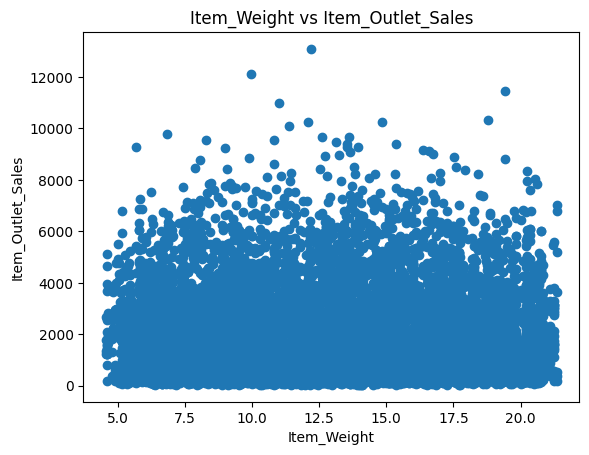

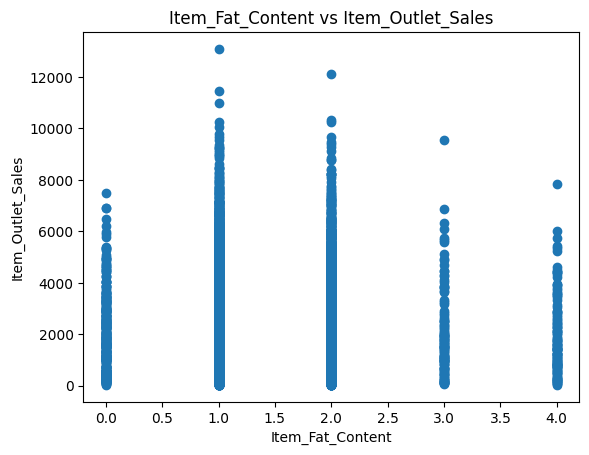

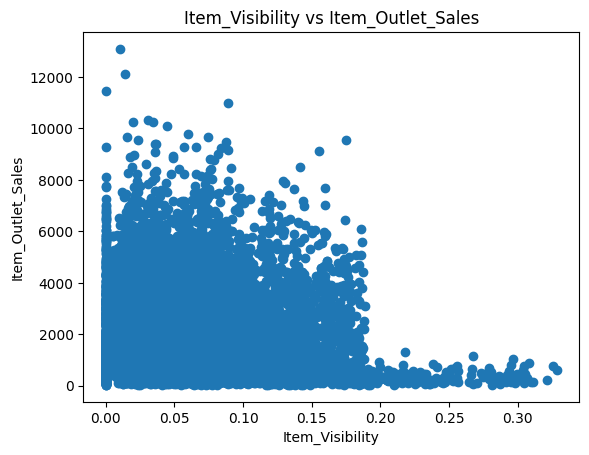

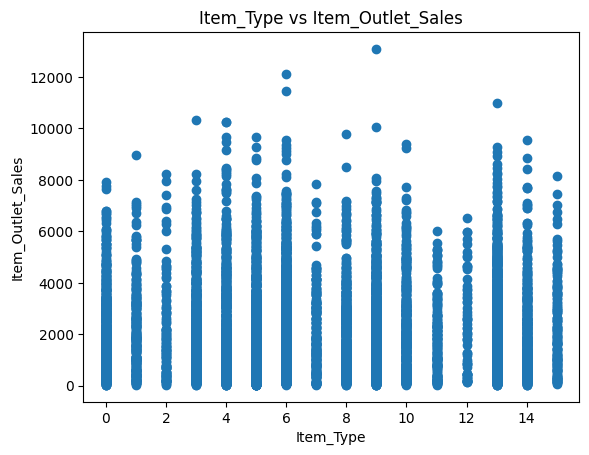

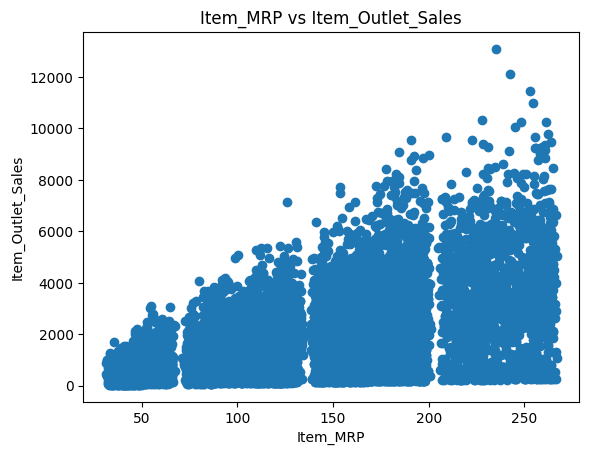

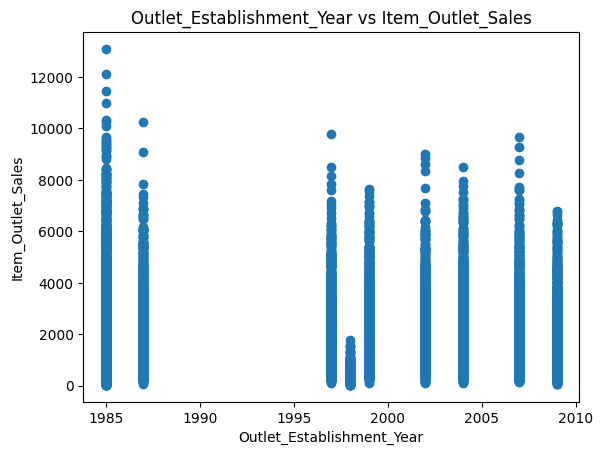

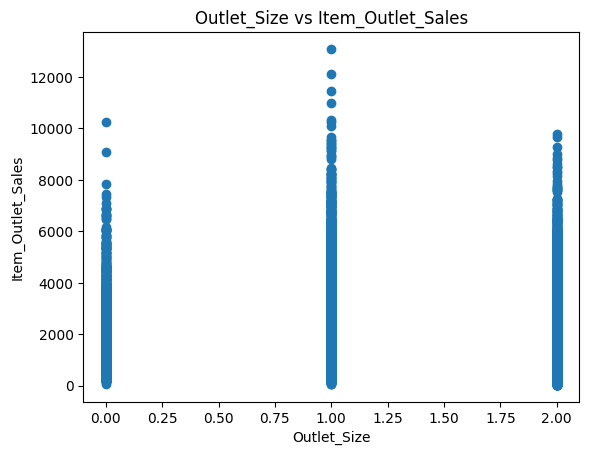

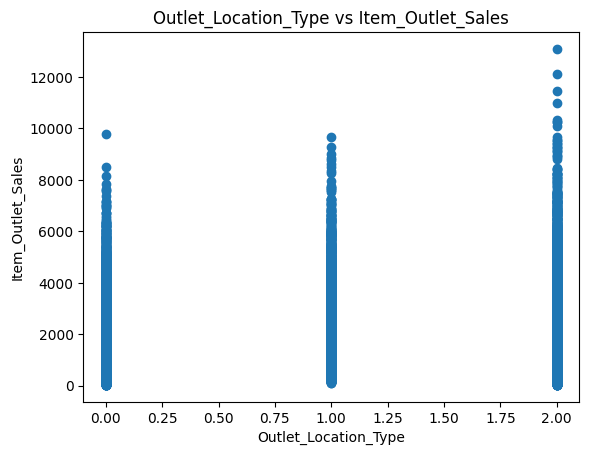

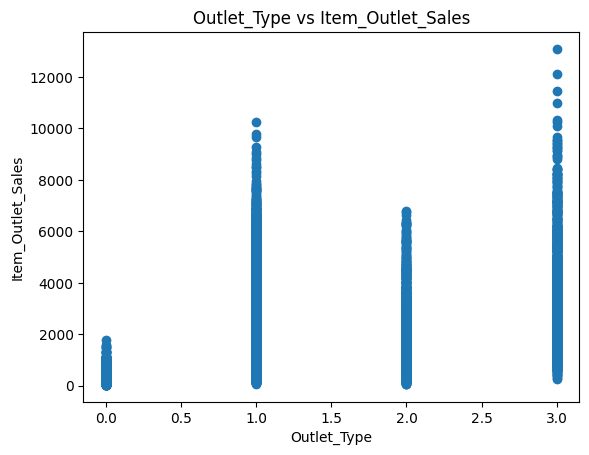

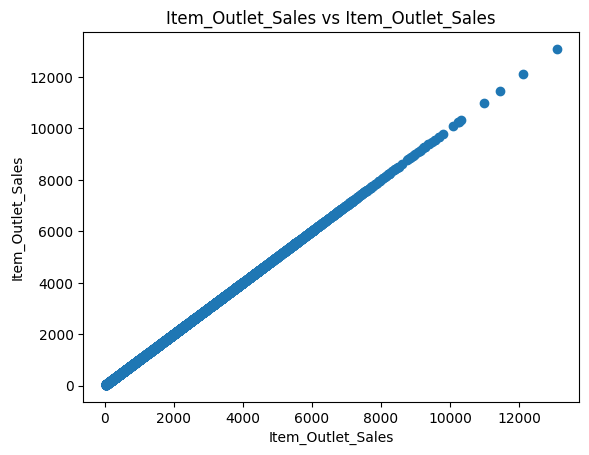

In [25]:
# We will plot each column of dataset against the Item_Outlet_Sales to check the relationship between them
for i, column in enumerate(data.columns):
    plt.scatter(data[column], data["Item_Outlet_Sales"])
    plt.xlabel(column)
    plt.ylabel("Item_Outlet_Sales")
    plt.title(column + " vs " + "Item_Outlet_Sales")
    plt.show()


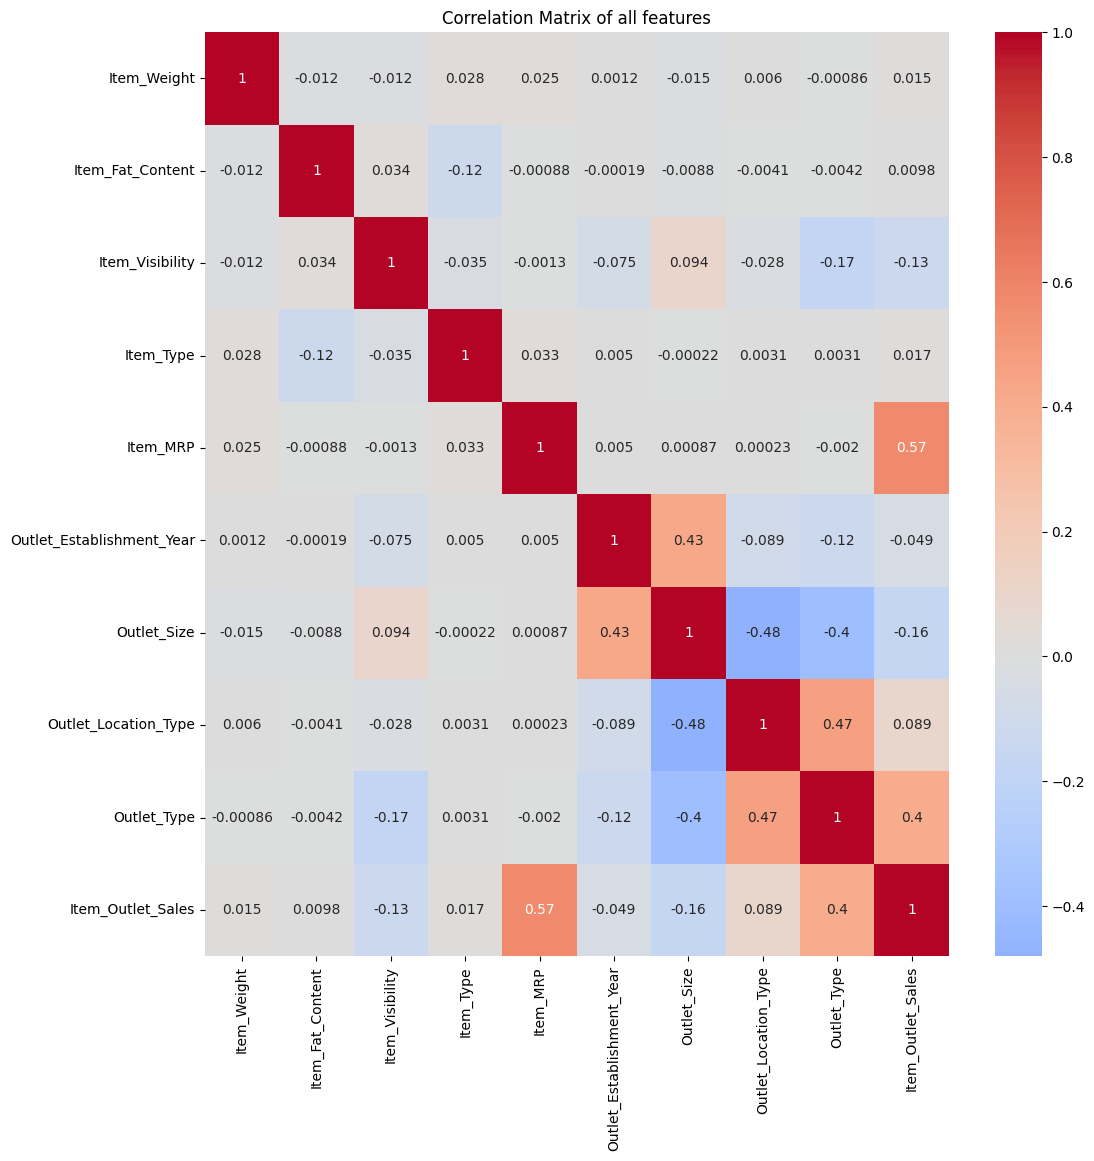

In [26]:
# We make a heatmap for all features to check the correlation between them
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center = 0)
plt.title("Correlation Matrix of all features")
plt.show()

[0.07783077 0.03451205 0.0833661  0.06703454 0.42381794 0.04283771
 0.01661039 0.01087369 0.24311681]


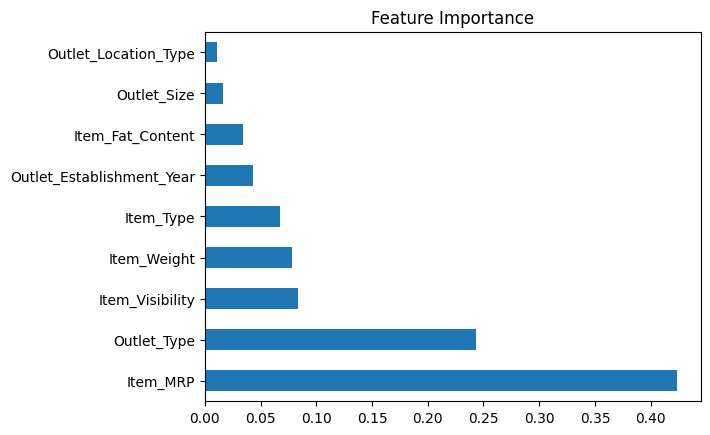

In [27]:
# Plot the feature importance
from sklearn.ensemble import ExtraTreesRegressor
X = data.drop('Item_Outlet_Sales', axis=1)
y = data['Item_Outlet_Sales']
model = ExtraTreesRegressor()
model.fit(X, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importance")
plt.show()

In [28]:
train_set1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8260,10.695,1,0.000000,5,60.5904,2007,2,1,1,410.1328
5019,7.365,1,0.042734,6,226.9720,2009,1,2,2,3848.3240
6694,20.100,1,0.075049,4,110.4228,2007,2,1,1,1105.2280
4801,7.810,2,0.055216,3,125.5046,2004,2,1,1,3237.1196
3778,6.035,2,0.066052,0,187.7240,2009,1,2,2,2050.6640


In [29]:
train_set2.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4382,11.7775,1,0.308145,6,222.0772,1985,2,0,0,889.5088
3650,10.5000,2,0.142420,1,161.1578,1987,0,2,1,1765.0358
2496,13.5000,2,0.068010,4,57.2562,2002,2,1,1,770.3306
3010,16.5000,1,0.074245,3,208.2638,2007,2,1,1,4762.4674
5423,20.7000,1,0.170153,3,182.6266,2002,2,1,1,2581.9724


In [30]:
# Trying to predict the sales using Decision Trees

from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

# We will make two decision tree models for training set 1 and training set 2
# For training set 1
X_train_set1 = train_set1.drop('Item_Outlet_Sales', axis=1)
y_train_set1 = train_set1['Item_Outlet_Sales']
model1 = DecisionTreeRegressor()
model1.fit(X_train_set1, y_train_set1)

# For training set 2
X_train_set2 = train_set2.drop('Item_Outlet_Sales', axis=1)
y_train_set2 = train_set2['Item_Outlet_Sales']
model2 = DecisionTreeRegressor()
model2.fit(X_train_set2, y_train_set2)

# Now we will predict the values for the test set using both the trees and use the average of the two trees as the final prediction
X_test = test.drop('Item_Outlet_Sales', axis=1)
y_test = test['Item_Outlet_Sales']

# Predicting the values for the test set
predict1 = model1.predict(X_test)
predict2 = model2.predict(X_test)

# Calculating the average of the two predictions
final_pred_DT = (predict1 + predict2) / 2

print("R2 score", metrics.r2_score(y_test, final_pred_DT))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, final_pred_DT)))


R2 score 0.38471351180143554
RMSE: 1382.8755194644343


In [31]:
# Trying to predict the sales using Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# We will make two random forest models for training set 1 and training set 2
# For training set 1
X_train_set1 = train_set1.drop('Item_Outlet_Sales', axis=1)
y_train_set1 = train_set1['Item_Outlet_Sales']
model1 = RandomForestRegressor()
model1.fit(X_train_set1, y_train_set1)

# For training set 2
X_train_set2 = train_set2.drop('Item_Outlet_Sales', axis=1)
y_train_set2 = train_set2['Item_Outlet_Sales']
model2 = RandomForestRegressor()
model2.fit(X_train_set2, y_train_set2)

# Now we will predict the values for the test set using both the trees and use the average of the two trees as the final prediction
X_test = test.drop('Item_Outlet_Sales', axis=1)
y_test = test['Item_Outlet_Sales']

# Predicting the values for the test set
predict1 = model1.predict(X_test)
predict2 = model2.predict(X_test)

# Calculating the average of the two predictions
final_pred_RF = (predict1 + predict2) / 2

print("R2 score", metrics.r2_score(y_test, final_pred_RF))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, final_pred_RF)))

R2 score 0.5741568045787288
RMSE: 1150.4539923536265


In [32]:
# Trying to predict the sales using Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn import metrics

# We will make two linear regression models for training set 1 and training set 2
# For training set 1
X_train_set1 = train_set1.drop('Item_Outlet_Sales', axis=1)
y_train_set1 = train_set1['Item_Outlet_Sales']
model1 = LinearRegression()
model1.fit(X_train_set1, y_train_set1)

# For training set 2
X_train_set2 = train_set2.drop('Item_Outlet_Sales', axis=1)
y_train_set2 = train_set2['Item_Outlet_Sales']
model2 = LinearRegression()
model2.fit(X_train_set2, y_train_set2)

# Now we will predict the values for the test set using both the trees and use the average of the two trees as the final prediction
X_test = test.drop('Item_Outlet_Sales', axis=1)
y_test = test['Item_Outlet_Sales']

# Predicting the values for the test set
predict1 = model1.predict(X_test)
predict2 = model2.predict(X_test)

# Calculating the average of the two predictions
final_pred_LR = (predict1 + predict2) / 2

print("R2 score", metrics.r2_score(y_test, final_pred_LR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, final_pred_LR)))

R2 score 0.5140199401058391
RMSE: 1229.0049289670214


In [33]:
# Trying to predict the sales using ADA Boost

from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics

# We will make two ADA Boost models for training set 1 and training set 2
# For training set 1
X_train_set1 = train_set1.drop('Item_Outlet_Sales', axis=1)
y_train_set1 = train_set1['Item_Outlet_Sales']
model1 = AdaBoostRegressor()
model1.fit(X_train_set1, y_train_set1)

# For training set 2
X_train_set2 = train_set2.drop('Item_Outlet_Sales', axis=1)
y_train_set2 = train_set2['Item_Outlet_Sales']
model2 = AdaBoostRegressor()
model2.fit(X_train_set2, y_train_set2)

# Now we will predict the values for the test set using both the trees and use the average of the two trees as the final prediction
X_test = test.drop('Item_Outlet_Sales', axis=1)
y_test = test['Item_Outlet_Sales']

# Predicting the values for the test set
predict1 = model1.predict(X_test)
predict2 = model2.predict(X_test)

# Calculating the average of the two predictions
final_pred_ADAB = (predict1 + predict2) / 2

print("R2 score", metrics.r2_score(y_test, final_pred_ADAB))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, final_pred_ADAB)))

R2 score 0.5360779543241075
RMSE: 1200.7895642814767


In [34]:
# Trying to predict the sales using Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

# We will make two Gradient Boosting models for training set 1 and training set 2
# For training set 1
X_train_set1 = train_set1.drop('Item_Outlet_Sales', axis=1)
y_train_set1 = train_set1['Item_Outlet_Sales']
model1 = GradientBoostingRegressor()
model1.fit(X_train_set1, y_train_set1)

# For training set 2
X_train_set2 = train_set2.drop('Item_Outlet_Sales', axis=1)
y_train_set2 = train_set2['Item_Outlet_Sales']
model2 = GradientBoostingRegressor()
model2.fit(X_train_set2, y_train_set2)

# Now we will predict the values for the test set using both the trees and use the average of the two trees as the final prediction
X_test = test.drop('Item_Outlet_Sales', axis=1)
y_test = test['Item_Outlet_Sales']

# Predicting the values for the test set
predict1 = model1.predict(X_test)
predict2 = model2.predict(X_test)

# Calculating the average of the two predictions
final_pred_GB = (predict1 + predict2) / 2

print("R2 score", metrics.r2_score(y_test, final_pred_GB))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, final_pred_GB)))

R2 score 0.5936480169115537
RMSE: 1123.8169842647412


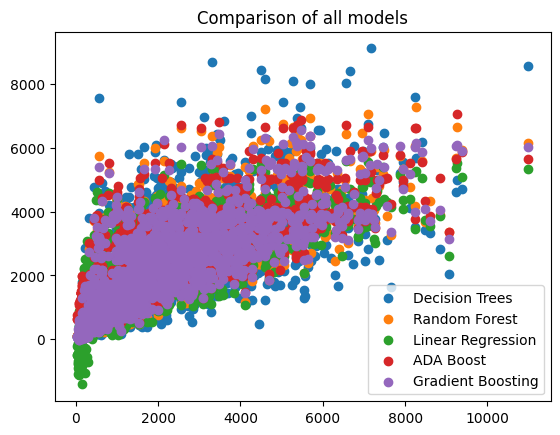

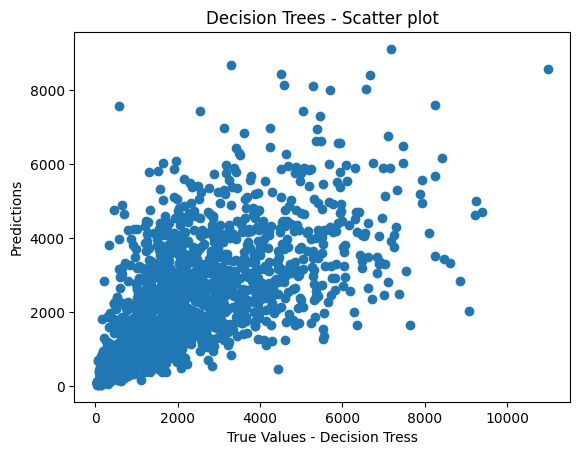

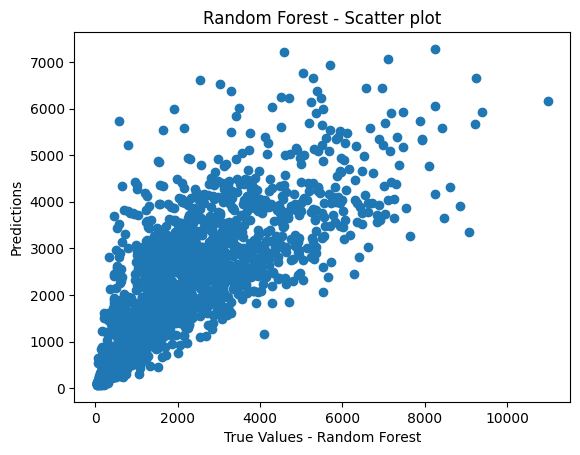

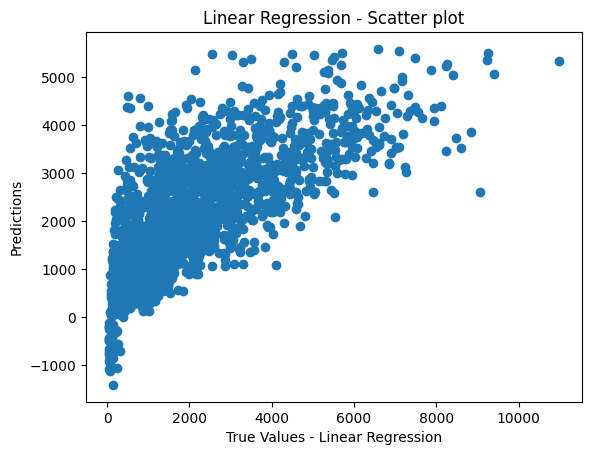

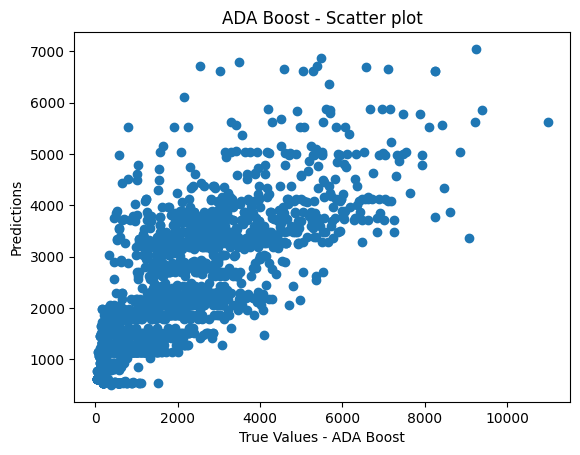

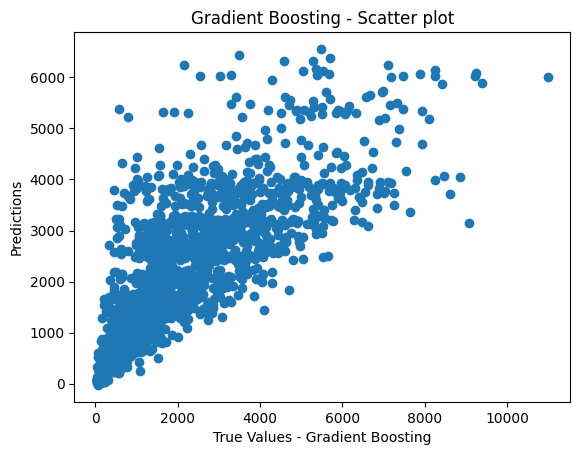

In [35]:
# We plot the results of all models to compare them on a single graph
plt.scatter(y_test, final_pred_DT, label='Decision Trees')
plt.scatter(y_test, final_pred_RF, label='Random Forest')
plt.scatter(y_test, final_pred_LR, label='Linear Regression')
plt.scatter(y_test, final_pred_ADAB, label='ADA Boost')
plt.scatter(y_test, final_pred_GB, label='Gradient Boosting')
plt.title('Comparison of all models')
plt.legend()
plt.show()


# We will compare the results of all models by plotting them on a graph
y_test = test['Item_Outlet_Sales']

# For Decision Trees
plt.scatter(y_test, final_pred_DT)
# plt.scatter(y_test, y_test)
plt.title('Decision Trees - Scatter plot')
plt.xlabel('True Values - Decision Tress')
plt.ylabel('Predictions')
plt.show()

# For Random Forest
plt.scatter(y_test, final_pred_RF)
# plt.scatter(y_test, y_test)
plt.title('Random Forest - Scatter plot')
plt.xlabel('True Values - Random Forest')
plt.ylabel('Predictions')
plt.show()

# For Linear Regression
plt.scatter(y_test, final_pred_LR)
# plt.scatter(y_test, y_test)
plt.title('Linear Regression - Scatter plot')
plt.xlabel('True Values - Linear Regression')
plt.ylabel('Predictions')
plt.show()

# For ADA Boost
plt.scatter(y_test, final_pred_ADAB)
# plt.scatter(y_test, y_test)
plt.title('ADA Boost - Scatter plot')
plt.xlabel('True Values - ADA Boost')
plt.ylabel('Predictions')
plt.show()

# For Gradient Boosting
plt.scatter(y_test, final_pred_GB)
# plt.scatter(y_test, y_test)
plt.title('Gradient Boosting - Scatter plot')
plt.xlabel('True Values - Gradient Boosting')
plt.ylabel('Predictions')
plt.show()


R2 score for Decision Trees: 0.38471351180143554
R2 score for Random Forest: 0.5741568045787288
R2 score for Linear Regression: 0.5140199401058391
R2 score for ADA Boost: 0.5360779543241075
R2 score for Gradient Boosting: 0.5936480169115537



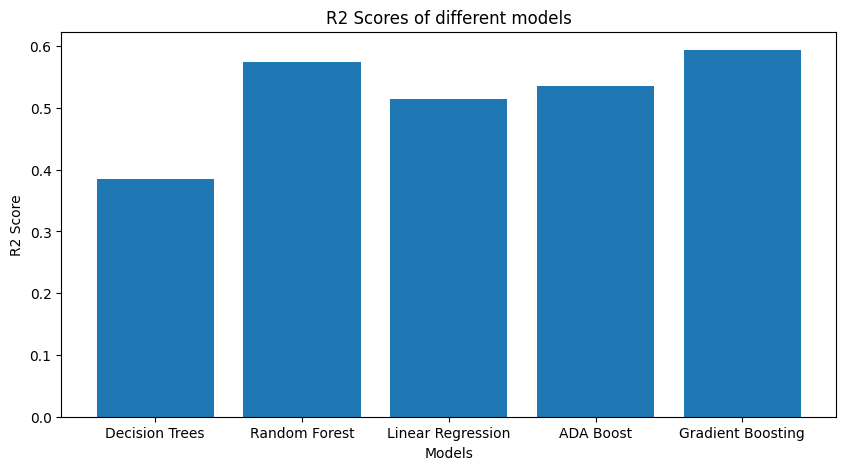

In [36]:
# We compare the accuracy of all the models by plotting the R2 score on a graph
R2_scores = [metrics.r2_score(y_test, final_pred_DT), metrics.r2_score(y_test, final_pred_RF), metrics.r2_score(y_test, final_pred_LR), metrics.r2_score(y_test, final_pred_ADAB), metrics.r2_score(y_test, final_pred_GB)]
print("""
R2 score for Decision Trees: {}
R2 score for Random Forest: {}
R2 score for Linear Regression: {}
R2 score for ADA Boost: {}
R2 score for Gradient Boosting: {}
""".format(R2_scores[0], R2_scores[1], R2_scores[2], R2_scores[3], R2_scores[4]))
models = ['Decision Trees', 'Random Forest', 'Linear Regression','ADA Boost', 'Gradient Boosting']
plt.figure(figsize=(10, 5))
plt.title('R2 Scores of different models')
plt.bar(models, R2_scores)
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.show()

Mean Absolute Error, Mean Squared Error, Root Mean Squared Error respectively for:
Decision Trees:  [971.2993036363637, 1912344.7023340291, 1382.8755194644343]
Random Forest:  [807.8272649794721, 1323544.3885223982, 1150.4539923536265]
Linear Regression:  [918.4878422937409, 1510453.1154252335, 1229.0049289670214]
ADA Boost:  [911.8132888556988, 1441895.5776872986, 1200.7895642814767]
Gradient Boosting:  [786.0676707236503, 1262964.6141218974, 1123.8169842647412]


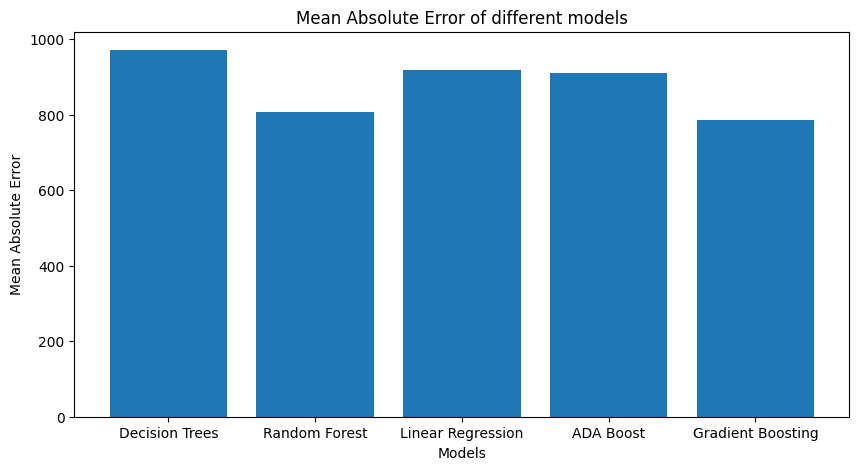

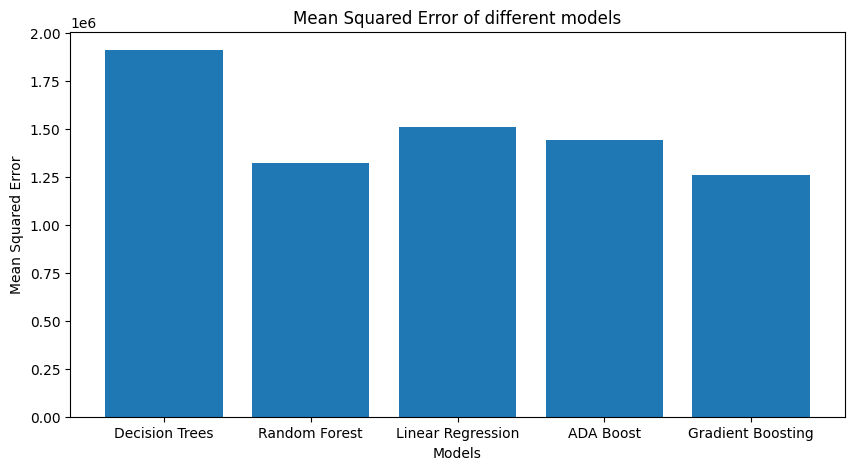

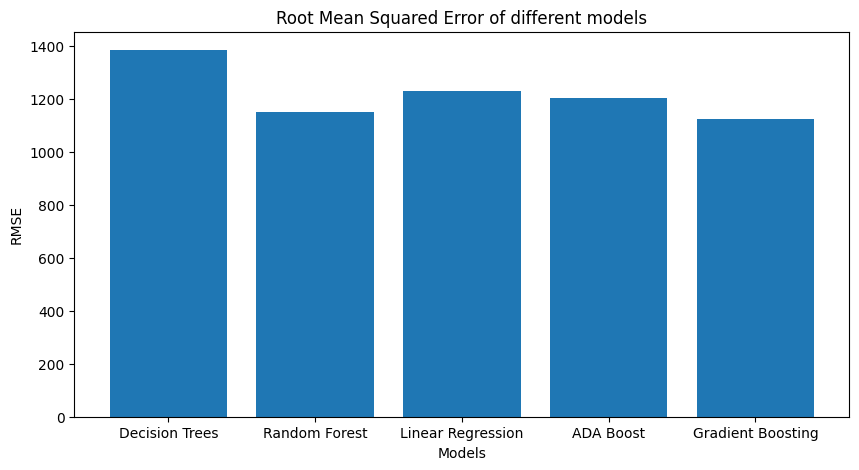

In [37]:
# check on other evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
decisionTrees = [mean_absolute_error(y_test, final_pred_DT),mean_squared_error(y_test, final_pred_DT),np.sqrt(metrics.mean_squared_error(y_test, final_pred_DT))]
randomForest = [mean_absolute_error(y_test, final_pred_RF),mean_squared_error(y_test, final_pred_RF),np.sqrt(metrics.mean_squared_error(y_test, final_pred_RF))]
linearRegression = [mean_absolute_error(y_test, final_pred_LR),mean_squared_error(y_test, final_pred_LR),np.sqrt(metrics.mean_squared_error(y_test, final_pred_LR))]
ADABoost = [mean_absolute_error(y_test, final_pred_ADAB),mean_squared_error(y_test, final_pred_ADAB),np.sqrt(metrics.mean_squared_error(y_test, final_pred_ADAB))]
GradientBoosting = [mean_absolute_error(y_test, final_pred_GB),mean_squared_error(y_test, final_pred_GB),np.sqrt(metrics.mean_squared_error(y_test, final_pred_GB))]
print("Mean Absolute Error, Mean Squared Error, Root Mean Squared Error respectively for:")
print("Decision Trees: ", decisionTrees)
print("Random Forest: ", randomForest)
print("Linear Regression: ", linearRegression)
print("ADA Boost: ", ADABoost)
print("Gradient Boosting: ", GradientBoosting)

MAE = [decisionTrees[0], randomForest[0], linearRegression[0], ADABoost[0], GradientBoosting[0]]
MSE = [decisionTrees[1], randomForest[1], linearRegression[1], ADABoost[1], GradientBoosting[1]]
RMSE = [decisionTrees[2], randomForest[2], linearRegression[2], ADABoost[2], GradientBoosting[2]]
labels = ['Decision Trees', 'Random Forest', 'Linear Regression', 'ADA Boost', 'Gradient Boosting']
plt.figure(figsize=(10, 5))
plt.bar(labels, MAE)
plt.title('Mean Absolute Error of different models')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.show()
plt.figure(figsize=(10, 5))
plt.bar(labels, MSE)
plt.title('Mean Squared Error of different models')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.show()
plt.figure(figsize=(10, 5))
plt.bar(labels, RMSE)
plt.title('Root Mean Squared Error of different models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()


In [38]:
# We perform feature scaling on the dataset
feature_scale = [feature for feature in data_copy.columns if feature not in ['Item_Identifier', 'Outlet_Identifier']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_copy[feature_scale])

StandardScaler()

In [39]:
# For feature selection
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel

pd.pandas.set_option('display.max_columns', None)

In [40]:
x_train = data_copy.drop(['Item_Outlet_Sales'], axis=1)
y_train = data_copy['Item_Outlet_Sales']

In [41]:
feature_sel_model = SelectFromModel(Ridge(alpha=1.0, random_state=0))
feature_sel_model.fit(x_train, y_train)

SelectFromModel(estimator=Ridge(random_state=0))

In [42]:
selected_feat = x_train.columns[(feature_sel_model.get_support())]

print('Total features: {}'.format((x_train.shape[1])))
print('Selected features: {}'.format(len(selected_feat)))
print('Features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))


Total features: 9
Selected features: 2
Features with coefficients shrank to zero: 0


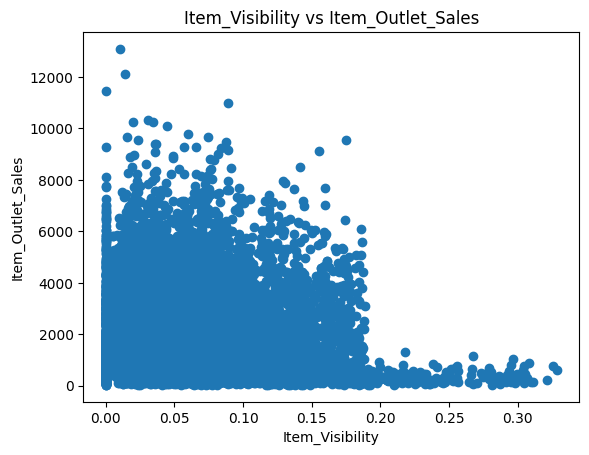

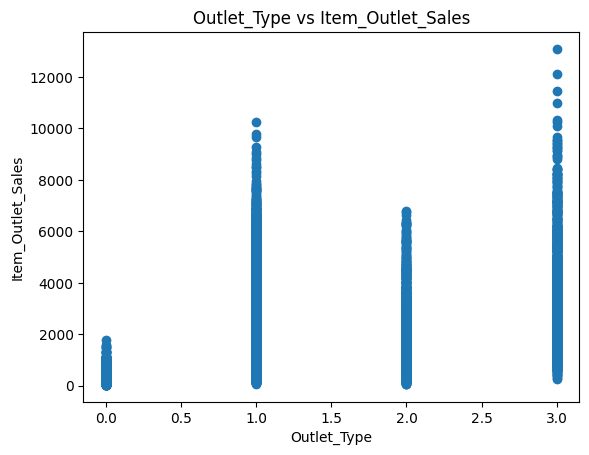

In [43]:
x_train = x_train[selected_feat]    # We will use only the selected features for training
# plot a scatter plot against all the selected features
for i, column in enumerate(x_train.columns):
    plt.scatter(x_train[column], y_train)
    plt.xlabel(column)
    plt.ylabel("Item_Outlet_Sales")
    plt.title(column + " vs " + "Item_Outlet_Sales")
    plt.show()


In [44]:
x_train.shape

(8523, 2)

In [45]:
# Trying to predict values using a decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

# We will make decision tree for x_train and y_train    
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

# Now we will predict the values for the test set using the tree
X_test = test.drop('Item_Outlet_Sales', axis=1)
X_test = X_test[selected_feat]
y_test = test['Item_Outlet_Sales']

# Predicting the values for the test set
final_pred_DecisionTrees = model.predict(X_test)

print("R2 score", metrics.r2_score(y_test, final_pred_DecisionTrees))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, final_pred_DecisionTrees)))

R2 score 0.9374528107305032
RMSE: 440.90832462757214


In [46]:
# Trying to predict values using Random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# We will make random forest for x_train and y_train
model = RandomForestRegressor()
model.fit(x_train, y_train)

# Now we will predict the values for the test set using the tree
X_test = test.drop('Item_Outlet_Sales', axis=1)
X_test = X_test[selected_feat]
y_test = test['Item_Outlet_Sales']

# Predicting the values for the test set
final_pred_RandomForest = model.predict(X_test)

print("R2 score", metrics.r2_score(y_test, final_pred_RandomForest))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, final_pred_RandomForest)))

R2 score 0.8180199810384785
RMSE: 752.0665148628005


In [47]:
# Trying to predict values using Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# We will make linear regression for x_train and y_train
model = LinearRegression()
model.fit(x_train, y_train)

# Now we will predict the values for the test set using the tree
X_test = test.drop('Item_Outlet_Sales', axis=1)
X_test = X_test[selected_feat]
y_test = test['Item_Outlet_Sales']

# Predicting the values for the test set
final_pred_LinearRegression = model.predict(X_test)

print("R2 score", metrics.r2_score(y_test, final_pred_LinearRegression))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, final_pred_LinearRegression)))

R2 score 0.1903265578115979
RMSE: 1586.3512192328374


In [48]:
# Trying to predict values using ADA Boost
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics

# We will make ADA Boost for x_train and y_train
model = AdaBoostRegressor()
model.fit(x_train, y_train)

# Now we will predict the values for the test set using the tree
X_test = test.drop('Item_Outlet_Sales', axis=1)
X_test = X_test[selected_feat]
y_test = test['Item_Outlet_Sales']

# Predicting the values for the test set
final_pred_ADABoost = model.predict(X_test)

print("R2 score", metrics.r2_score(y_test, final_pred_ADABoost))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, final_pred_ADABoost)))

R2 score 0.16611278620581715
RMSE: 1609.8968732888006


In [49]:
# Trying to predict value using Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

# We will make Gradient Boosting for x_train and y_train
model = GradientBoostingRegressor()
model.fit(x_train, y_train)

# Now we will predict the values for the test set using the tree
X_test = test.drop('Item_Outlet_Sales', axis=1)
X_test = X_test[selected_feat]
y_test = test['Item_Outlet_Sales']

# Predicting the values for the test set
final_pred_GradientBoosting = model.predict(X_test)

print("R2 score", metrics.r2_score(y_test, final_pred_GradientBoosting))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, final_pred_GradientBoosting)))

R2 score 0.30427113390536054
RMSE: 1470.4979077906223


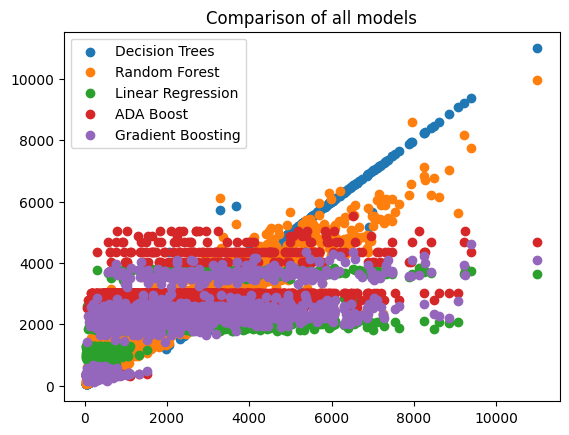

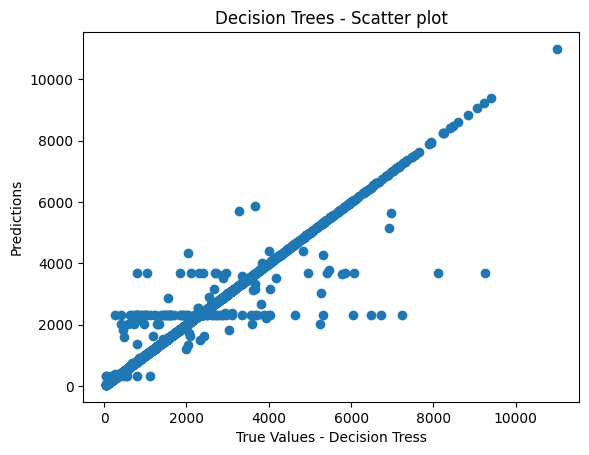

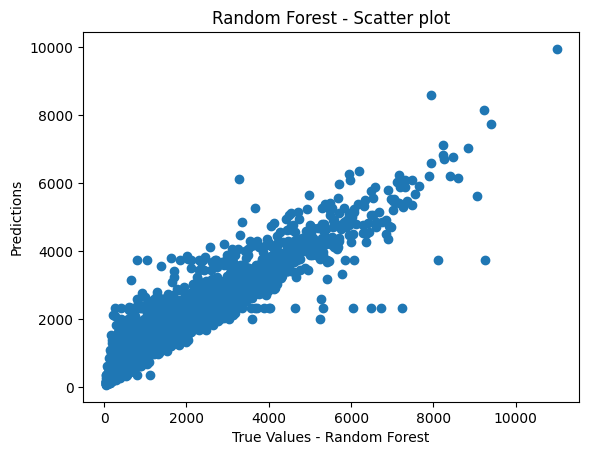

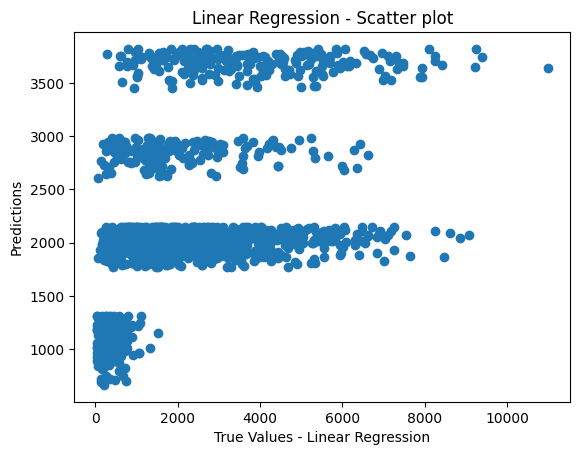

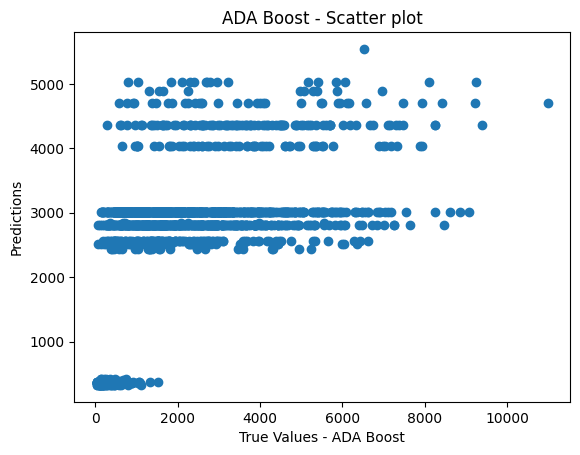

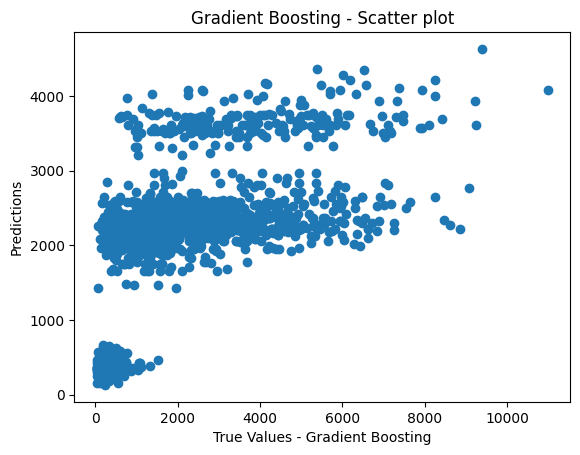

In [50]:
# Plotting the results of all models to compare them on a single graph
plt.scatter(y_test, final_pred_DecisionTrees, label='Decision Trees')
plt.scatter(y_test, final_pred_RandomForest, label='Random Forest')
plt.scatter(y_test, final_pred_LinearRegression, label='Linear Regression')
plt.scatter(y_test, final_pred_ADABoost, label='ADA Boost')
plt.scatter(y_test, final_pred_GradientBoosting, label='Gradient Boosting')
plt.title('Comparison of all models')
plt.legend()
plt.show()

# We will compare the results of all models by plotting them on a graph
y_test = test['Item_Outlet_Sales']

# For Decision Trees
plt.scatter(y_test, final_pred_DecisionTrees)
# plt.scatter(y_test, y_test)
plt.title('Decision Trees - Scatter plot')
plt.xlabel('True Values - Decision Tress')
plt.ylabel('Predictions')
plt.show()

# For Random Forest
plt.scatter(y_test, final_pred_RandomForest)
# plt.scatter(y_test, y_test)
plt.title('Random Forest - Scatter plot')
plt.xlabel('True Values - Random Forest')
plt.ylabel('Predictions')
plt.show()

# For Linear Regression
plt.scatter(y_test, final_pred_LinearRegression)
# plt.scatter(y_test, y_test)
plt.title('Linear Regression - Scatter plot')
plt.xlabel('True Values - Linear Regression')
plt.ylabel('Predictions')
plt.show()

# For ADA Boost
plt.scatter(y_test, final_pred_ADABoost)
# plt.scatter(y_test, y_test)
plt.title('ADA Boost - Scatter plot')
plt.xlabel('True Values - ADA Boost')
plt.ylabel('Predictions')
plt.show()

# For Gradient Boosting
plt.scatter(y_test, final_pred_GradientBoosting)
# plt.scatter(y_test, y_test)
plt.title('Gradient Boosting - Scatter plot')
plt.xlabel('True Values - Gradient Boosting')
plt.ylabel('Predictions')
plt.show()


R2 Score for Decision Trees: 0.9374528107305032
R2 Score for Random Forest: 0.8180199810384785
R2 Score for Linear Regression: 0.1903265578115979
R2 Score for ADA Boost: 0.16611278620581715
R2 Score for Gradient Boosting: 0.30427113390536054



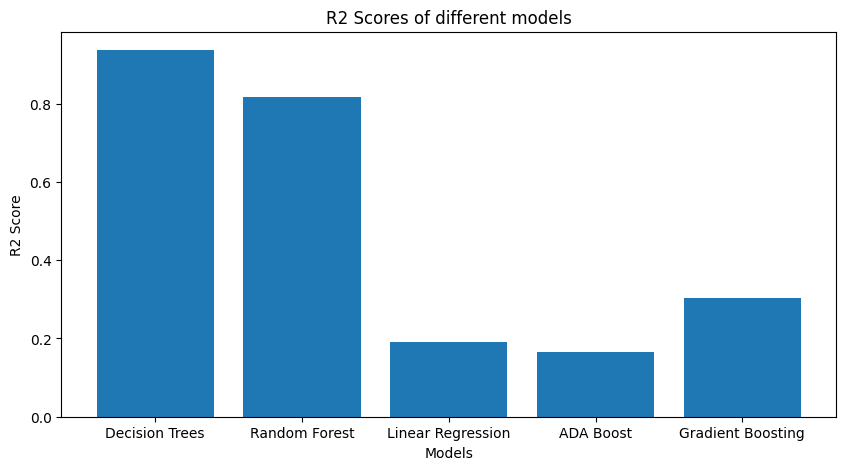

In [51]:
# PLotting the R2 scores of all models to compare them
R2_scores = [metrics.r2_score(y_test, final_pred_DecisionTrees), metrics.r2_score(y_test, final_pred_RandomForest), metrics.r2_score(y_test, final_pred_LinearRegression), metrics.r2_score(y_test, final_pred_ADABoost), metrics.r2_score(y_test, final_pred_GradientBoosting)]
models = ['Decision Trees', 'Random Forest', 'Linear Regression','ADA Boost', 'Gradient Boosting']
print("""
R2 Score for Decision Trees: {}
R2 Score for Random Forest: {}
R2 Score for Linear Regression: {}
R2 Score for ADA Boost: {}
R2 Score for Gradient Boosting: {}
""".format(R2_scores[0], R2_scores[1], R2_scores[2], R2_scores[3], R2_scores[4]))
plt.figure(figsize=(10, 5))
plt.title('R2 Scores of different models')
plt.bar(models, R2_scores)
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.show()



RMSE of Decision Trees: 440.90832462757214
RMSE of Random Forest: 752.0665148628005
RMSE of Linear Regression: 1586.3512192328374
RMSE of ADA Boost: 1609.8968732888006
RMSE of Gradient Boosting: 1470.4979077906223



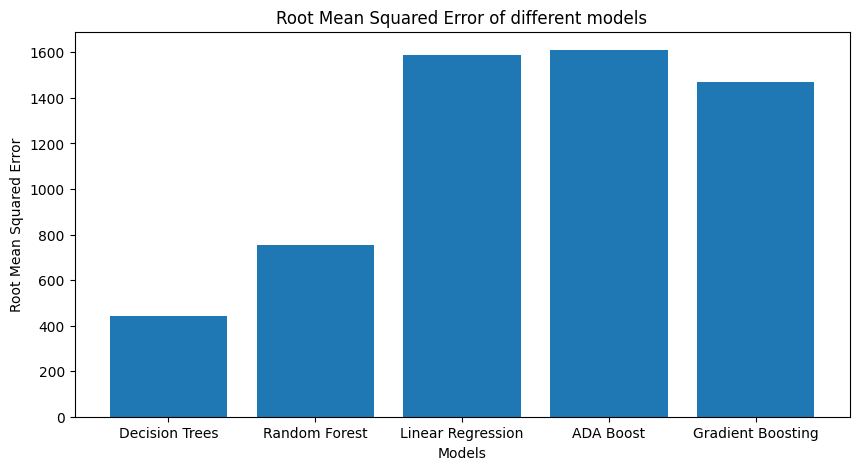


MSE of Decision Trees: 194400.15072589254
MSE of Random Forest: 565604.042777879
MSE of Linear Regression: 2516510.1907615094
MSE of ADA Boost: 2591767.9426250565
MSE of Gradient Boosting: 2162364.0968165975



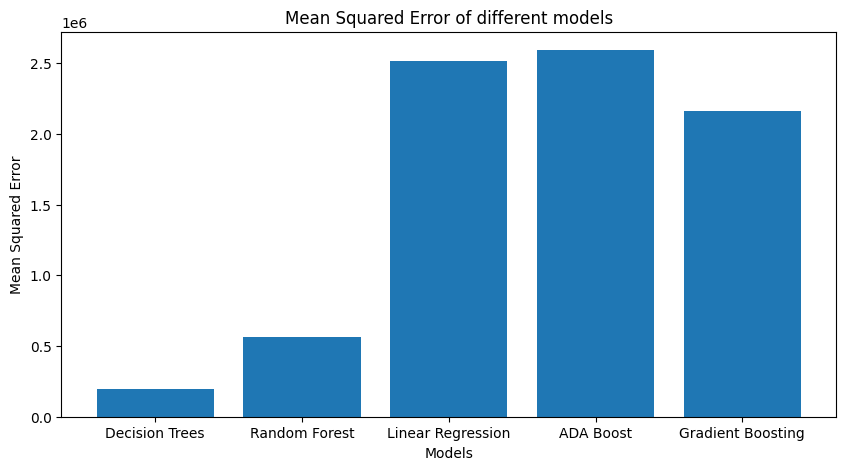


MAE of Decision Trees: 98.42298575013909
MAE of Random Forest: 516.9972135426533
MAE of Linear Regression: 1214.1243571570337
MAE of ADA Boost: 1273.1358926939633
MAE of Gradient Boosting: 1088.5933248251042



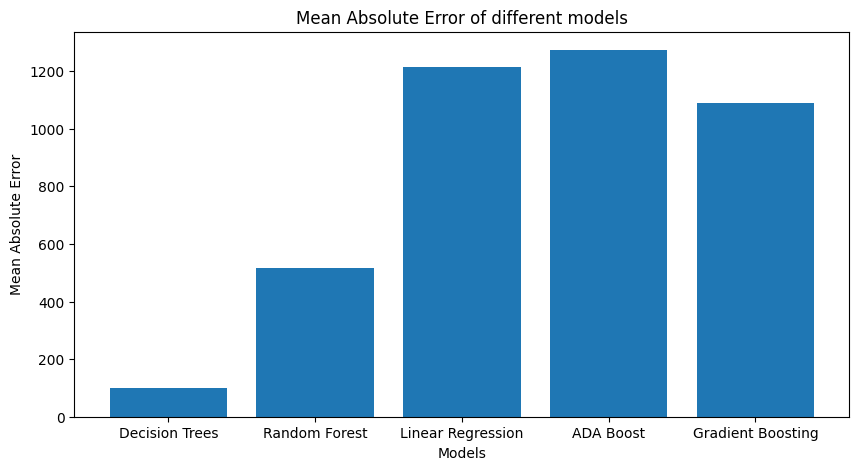

In [52]:
# Plotting RMSE of all models to compare them
RMSE = [np.sqrt(metrics.mean_squared_error(y_test, final_pred_DecisionTrees)), np.sqrt(metrics.mean_squared_error(y_test, final_pred_RandomForest)), np.sqrt(metrics.mean_squared_error(y_test, final_pred_LinearRegression)), np.sqrt(metrics.mean_squared_error(y_test, final_pred_ADABoost)), np.sqrt(metrics.mean_squared_error(y_test, final_pred_GradientBoosting))]
print(f"""
RMSE of Decision Trees: {np.sqrt(metrics.mean_squared_error(y_test, final_pred_DecisionTrees))}
RMSE of Random Forest: {np.sqrt(metrics.mean_squared_error(y_test, final_pred_RandomForest))}
RMSE of Linear Regression: {np.sqrt(metrics.mean_squared_error(y_test, final_pred_LinearRegression))}
RMSE of ADA Boost: {np.sqrt(metrics.mean_squared_error(y_test, final_pred_ADABoost))}
RMSE of Gradient Boosting: {np.sqrt(metrics.mean_squared_error(y_test, final_pred_GradientBoosting))}
""")
models = ['Decision Trees', 'Random Forest', 'Linear Regression','ADA Boost', 'Gradient Boosting']
plt.figure(figsize=(10, 5))
plt.title('Root Mean Squared Error of different models')
plt.bar(models, RMSE)
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error')
plt.show()
# Plotting MSE of all models to compare them
MSE = [metrics.mean_squared_error(y_test, final_pred_DecisionTrees), metrics.mean_squared_error(y_test, final_pred_RandomForest), metrics.mean_squared_error(y_test, final_pred_LinearRegression), metrics.mean_squared_error(y_test, final_pred_ADABoost), metrics.mean_squared_error(y_test, final_pred_GradientBoosting)]
print(f"""
MSE of Decision Trees: {metrics.mean_squared_error(y_test, final_pred_DecisionTrees)}
MSE of Random Forest: {metrics.mean_squared_error(y_test, final_pred_RandomForest)}
MSE of Linear Regression: {metrics.mean_squared_error(y_test, final_pred_LinearRegression)}
MSE of ADA Boost: {metrics.mean_squared_error(y_test, final_pred_ADABoost)}
MSE of Gradient Boosting: {metrics.mean_squared_error(y_test, final_pred_GradientBoosting)}
""")
models = ['Decision Trees', 'Random Forest', 'Linear Regression','ADA Boost', 'Gradient Boosting']
plt.figure(figsize=(10, 5))
plt.title('Mean Squared Error of different models')
plt.bar(models, MSE)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.show()

# Plotting MAE of all models to compare them
MAE = [metrics.mean_absolute_error(y_test, final_pred_DecisionTrees), metrics.mean_absolute_error(y_test, final_pred_RandomForest), metrics.mean_absolute_error(y_test, final_pred_LinearRegression), metrics.mean_absolute_error(y_test, final_pred_ADABoost), metrics.mean_absolute_error(y_test, final_pred_GradientBoosting)]
print(f"""
MAE of Decision Trees: {metrics.mean_absolute_error(y_test, final_pred_DecisionTrees)}
MAE of Random Forest: {metrics.mean_absolute_error(y_test, final_pred_RandomForest)}
MAE of Linear Regression: {metrics.mean_absolute_error(y_test, final_pred_LinearRegression)}
MAE of ADA Boost: {metrics.mean_absolute_error(y_test, final_pred_ADABoost)}
MAE of Gradient Boosting: {metrics.mean_absolute_error(y_test, final_pred_GradientBoosting)}
""")
models = ['Decision Trees', 'Random Forest', 'Linear Regression','ADA Boost', 'Gradient Boosting']
plt.figure(figsize=(10, 5))
plt.title('Mean Absolute Error of different models')
plt.bar(models, MAE)
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.show()